#Classification of Water Consumption Types

[Assignment SI - Infos](https://drive.google.com/file/d/1lh5a0YxVsC-NXtsIpucTVCrfJR_8KZB4/view?usp=sharing)

[Dataset Train](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/train.csv)

[Dataset Competition](https://virtual.ipb.pt/access/content/group/5b961040-5442-11ee-bfc7-421e367e2b5a/Assignment/competition.csv)

### 1) **IMPORT** and **UTILITY**

Import all usefull libraries and define some usefull functions

In [1]:
###########################
# data libraries
###########################
import pandas as pd
import numpy as np

###########################
# plot libraries
###########################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


### 2) **READ DATA FILES**

Read data file uploaded to this google colab

In [2]:
###########################
# import csv in dataframe
###########################

train = pd.read_csv("train.csv")
# test = pd.read_csv("competition.csv")

### 3) **Preprocessing**

Change the Consumer Numbers that are more one Consumer type

In [3]:
consumer_list = []
consumer_number_list = train['Consumer_number'].unique()

for consumer in consumer_number_list:
  consumer_examples = train.loc[train['Consumer_number'] == consumer]
  type_list = consumer_examples['Consumer_type'].unique()
  consumer_list.append( { consumer : type_list } )

In [4]:
consumer_list_that_have_more_one_type = []

for consumer in consumer_list:
  key = list(consumer.keys())[0]
  type_list = consumer.get(key)
  if len(type_list) > 1:
    consumer_list_that_have_more_one_type.append(key)

print(consumer_list_that_have_more_one_type)

['BRRN45011194906887', 'ZTXB62277071332927', 'BFNZ91758979264680', 'EJRR94082279846978', 'TXRC60025138635768', 'TOIJ32662986851457', 'EIBW79483707803266', 'XPIZ50071980679028', 'WKCP50077754358089', 'LESR81245049449880', 'TBHB68132836135028', 'TWZX42106612273456', 'ZMXG99941480753427', 'ZPLW80108346743533', 'BFTN16945177224840', 'CSWC23758265927802', 'RCFS67372761642995', 'KQXL90455068893320', 'WAYS32157853029087', 'CHEA76154230713885', 'CEQY59334340467058', 'KHSU96679823415344', 'LYBO97253634774301', 'HLXL53678838044114', 'LOSH00512257839544', 'NUEE47036787600269', 'BUUS93439947522721', 'TVJC36822960176394', 'YDJZ16302164721234', 'ASWE99338492358606', 'PLVL03997317302886', 'WYLI02336820141526', 'UPDO61732813078371', 'BSZP22820917115784', 'OZFO89433561413285', 'GJAE58387362216192', 'MEDY93463490536798', 'FXUH14467645775657', 'UWFN91155998083131', 'CPJV81664483214540', 'UHLO59837487978761', 'ISNU31897375992575', 'UYXT35333830139433', 'TNWY28512694199519', 'THDQ76080393620734', 'UOUD0769

In [5]:
import random
import string

def generate_consumer_number():
    random_part = ''.join(random.choices(string.ascii_uppercase + string.digits, k=20))
    identifier = random_part
    return identifier

In [6]:
for consumer_number in consumer_list_that_have_more_one_type:

  consumer_examples = train.loc[train['Consumer_number'] == consumer_number]
  type_list = consumer_examples['Consumer_type'].unique()

  for one_type in type_list:
    consumer_and_one_type = train.loc[(train['Consumer_number'] == consumer_number) & (train['Consumer_type'] == one_type)]
    consumer_and_one_type['Consumer_number'] = generate_consumer_number()
    train.loc[(train['Consumer_number'] == consumer_number) & (train['Consumer_type'] == one_type)] = consumer_and_one_type

<ipython-input-6-3b8cdc5df7b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_and_one_type['Consumer_number'] = generate_consumer_number()


In [7]:
consumer_list = []
consumer_number_list = train['Consumer_number'].unique()

for consumer in consumer_number_list:
  consumer_examples = train.loc[train['Consumer_number'] == consumer]
  type_list = consumer_examples['Consumer_type'].unique()
  consumer_list.append( { consumer : type_list } )

In [8]:
for consumer in consumer_list:
  key = list(consumer.keys())[0]
  type_list = consumer.get(key)
  if len(type_list) > 1:
    print(consumer)

#### Remove Outliers

Remove the single value with water consumption of 5000 because it could create some problem during the training of the model

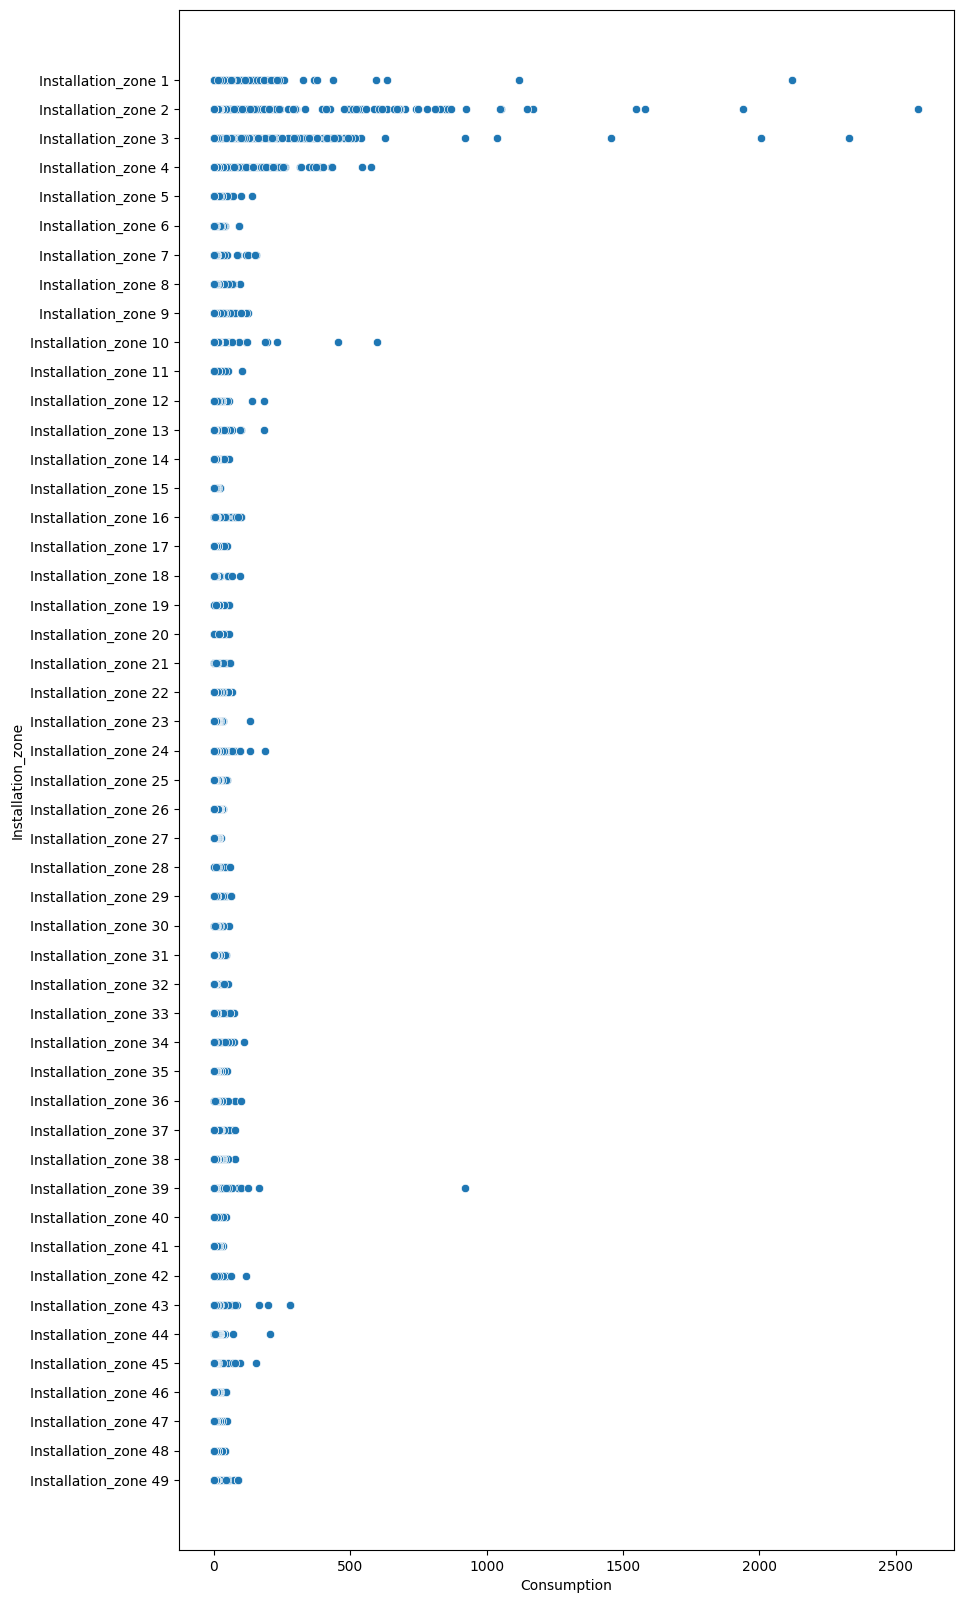

In [9]:
train_outliers = train['Consumption'] > 3000

# remove outliers
train.drop(train[train_outliers].index,inplace=True)
train.head()

# plot new
plt.figure(figsize=(10, 20))
fig = sns.scatterplot(data=train, x='Consumption',y='Installation_zone')

Remove the consumers that have less 20 measure of water consumption

<Axes: xlabel='Consumer_type', ylabel='Count'>

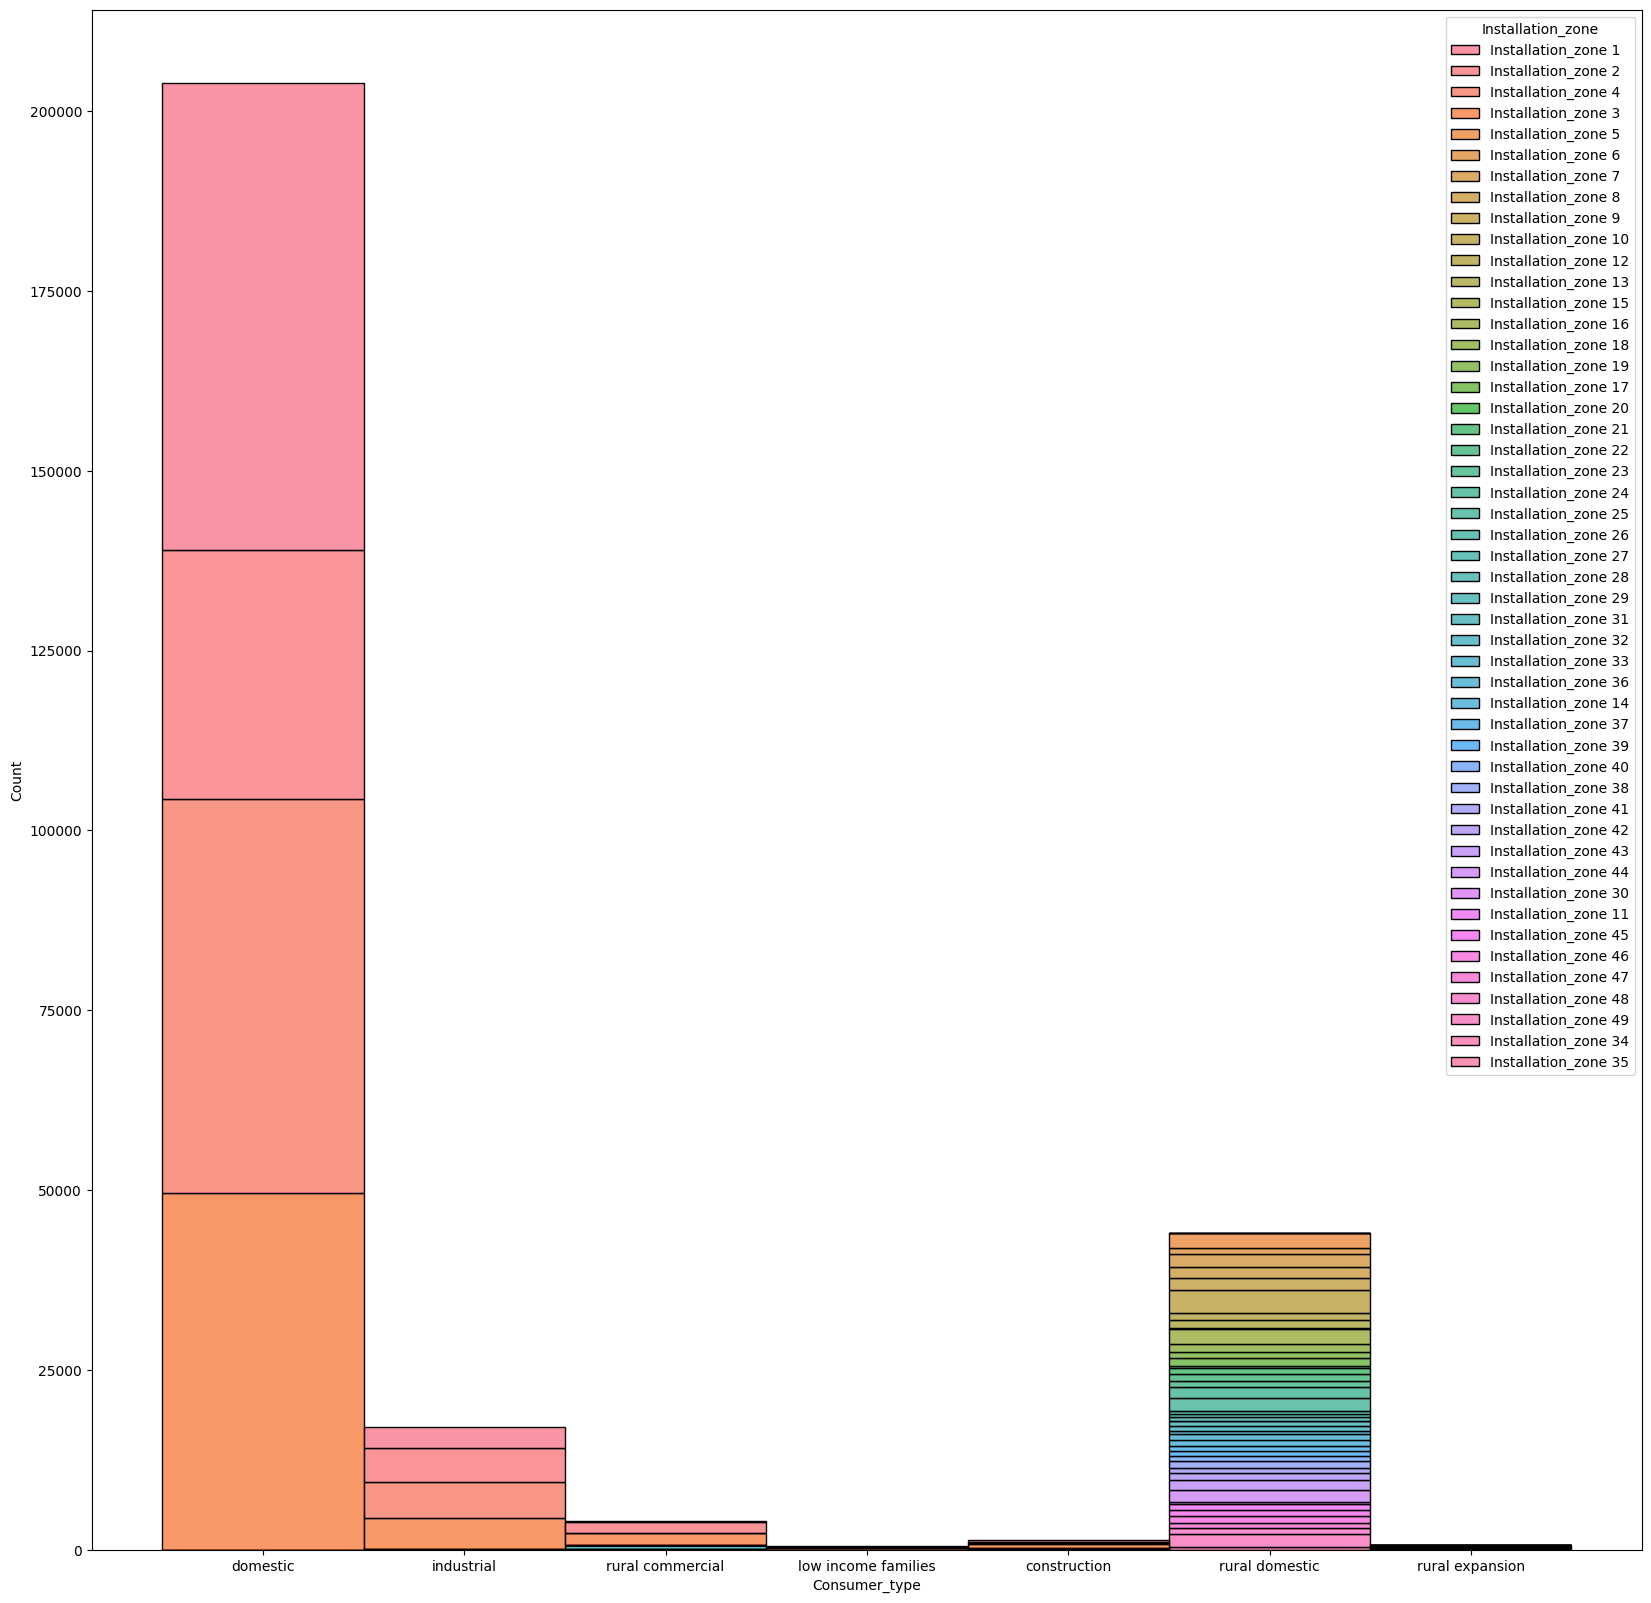

In [10]:
consumer_counts = train['Consumer_number'].value_counts()
consumer_that_will_preserve = consumer_counts[consumer_counts >= 10].index
train_without_outliers = train[train['Consumer_number'].isin(consumer_that_will_preserve)]

plt.figure(figsize=(20, 20))
sns.histplot(data=train_without_outliers, x='Consumer_type',hue='Installation_zone',multiple="stack")

In [11]:
pd.set_option("display.max_rows", None)
train_without_outliers['Consumer_number'].value_counts()

YCON07527914360537      40
GDKU38942785196943      40
ZHVC51180765716340      38
REPS34909515613220      37
VWUF92943898568536      37
YXYE81906634271592      37
TGMW61137402607632      37
LORC83889392450134      37
HVYR74843115470340      37
AHYE72103757984668      37
PWTY51610558441307      37
AIHA34110171634564      36
VSNV51439018689557      36
JOKZ47022485911421      36
EKPW40701820257435      36
KGXI38491240432727      36
RMXJ25747108034705      36
BJCM32993130006782      35
EPSP11516377201512      35
MOEY96083650824433      35
SVUX21947013552899      35
MBLA71290504725654      35
BEMQ44179216666801      35
EVYD34656179074293      35
VXSY89154715074455      35
LPWJ89332193540704      35
ECGW89394097174807      35
JCHF05219468263571      35
IEIW04034776526917      34
BRCU52402173109963      34
BWUX10326747424155      34
HARH20259677345059      34
AUQT41503462223978      34
MTJZ72031019004954      34
LWZA77676329904345      34
MOAX19946590174327      34
JTGE44306922058198      34
I

### 4) **Export to CSV**

In [12]:
train_without_outliers.to_csv('train_without_outliers.csv', sep=',', index=False)